# StatQuest: Basic Reinforcement Learning (RL)

Copyright 2025, Joshua Starmer

----

In this tutorial we illustrate a very simple example of **Reinforcement Learning** (**RL**) by using it figure out where we should go, to **Norm's Fry Hut** or **'Squatch's Fry Shack**, if we want to maximize the number of fries we eat. This is complicated by the fact that **Norm** and **\`Squatch** have different probabilities they will serve us large orders of fries. This example is based on the StatQuest video: **[Reinforcement Learning: Essential Concepts](https://youtu.be/Z-T0iJEXiwM)**

----

# Import the modules that will do all the work

The very first thing we need to do is load a bunch of Python modules. Python itself is just a basic programming language. These modules give us extra functionality to generate random numbers and draw fancy graphs.

In [2]:
import numpy as np
import seaborn as sns

----

# Using Reinforcement Learning to figure out how to get the most fries

In this exmaple, we're going to define the probilities that **Norm** and **'Squatch** serve us small and large orders of fries and then, pretending we don't know the real probabilities, we'll use **Reinforcement Learning** to where we should go if we want to maximize the number of fries we eat.

So the first thing we do is define the probablities that **Norm** and **'Squatch** will serve us large or small orders of fries...

In [3]:
## probabilities that 'squatch and norm will 
## serve a large or small portion of fries
## NOTE: s = 'squatch, n = norm
## ALSO NOTE: 'squatch rarely serves a large order
##             of fries and norm frequently does.
s_large = 0.15
s_small = (1 - s_large)
n_large = 0.80
n_small = (1 - n_large)

Now that we have defined the probabilities that **Norm** and **'Squatch** will serve us small and large orders of fries, let's use **Reinforcement Learning** to figure out how frequently we should go to **'Squatch's Fry Shack** to order fries if we want to maximize the number of fries we eat.

We'll start by initializing the probability we go to **'Squatch's Fry Shack** to **0.5**. In other words, at the start, there is an equal probability that we will go to **'Squatch's Fry Shack** or **Norm's Fry Hut**.

In [6]:
## initial probabilities that we will select
## 'squatch's fry shack
go_to_s = 0.5

Now let's pick a random number and use that to decide where we should go to eat fries. If the random number is less than or equal to `go_to_s`, then we'll go to **'Squatch's Fry Shack**. If it is greater than `go_to_s`, we'll visit **Norm's Fry Hut**. We'll then order some fries and adjust `go_to_s` based on whether or not we got a large order. We'll then repeat that process a bunch of times to find the optimal probability that we should go to **'Squatch's Fry Shack**.

**NOTE:** We're going to run this code twice. The first time, we're just going to oder fries a few times and print out a lot of stuff so we can see how Reinforcement Learning works in this example. Then we'll order a lot of fries (without printing out anything) so we can find the optimal probability that we go to **'Squatch's Fry Shack**.

## First, let's just order fries a few times...

...so we can print out a lot of stuff and verify that the reinforcement learning process is working as expected.

In [21]:
go_to_s = 0.5 # intial probability we visit 'Squatch's

np.random.seed(42) # seeding the random number generator helps 
                   # ensure that you get results that are similar
                   # to mine.

## how many times will we go out for fries?
num_visits = 5

## how much should we scale each change in go_to_s
learning_rate = 0.1

## Each time we order fries, we're going
## to update the probability that we will
## visit 'Squatch's Fry Shack. We'll save
## these probabilities so we can graph them
## and take the average to determine the
## optimal strategy for getting the most fries.
probs_to_visit_s = np.zeros(num_visits+1)

## now let's order a lot of fries!!!
for i in np.arange(0, num_visits):
    
    ## first, pick a random number between 0 and 1
    ## to determine if we should visit 'Squatch's Fry Shack
    visit_s = np.random.uniform(low=0, high=1)
    probs_to_visit_s[i] = go_to_s # save the probabliity so we can graph it later
    
    print("visit:", i)
    print("\tgo_to_s:", go_to_s)
    print("\tvisit_s:", visit_s)

    ## If visit_s <= go_to_s, then go to 'Squatch's...
    if (visit_s <= go_to_s):
        
        print("\tvisiting squatch")

        ## Now let's see if squatch gives us a large
        ## order of fries by first picking a random number
        ## between 0 and 1...
        large_order = np.random.uniform(low=0, high=1)

        ## If the random number is <= s_large, then
        ## 'Squatch gave us a large order of fries...
        if (large_order <= s_large):
            
            print("\tgot a large order")
            
            ## If 'squatch gives us a large order of fries,
            ## increase the probability of visiting 'squatch         
            go_to_s = go_to_s + (learning_rate * (1 - go_to_s))
            print("\tupdated go_to_s:", go_to_s)
            
        else: # ...otherwise we got a small order
            
            print("\tgot a small order")
            
            ## If 'squatch gives us a small order of fries,
            ## decrease the probability of visiting 'squatch          
            go_to_s = go_to_s + (learning_rate * (0 - go_to_s))
            print("\tupdated go_to_s:", go_to_s)
            
    else: # ...otherwise we visit Norm's
        
        print("\tvisiting norm")
        
        large_order = np.random.uniform(low=0, high=1)
        
        if (large_order <= n_large):
            
            print("\tgot a large order")
            
            ## If norm gives us a large order of fries,
            ## increase the probability of visiting norm
            go_to_s = go_to_s + (learning_rate * (0 - go_to_s))
            print("\tupdated go_to_s:", go_to_s)
            
        else:
            
            print("\tgot a small order")
            
            ## If norm gives us a small order of fries,
            ## decrease the probability of visiting norm
            go_to_s = go_to_s + (learning_rate * (1 - go_to_s))
            print("\tupdated go_to_s:", go_to_s)
    print("")

probs_to_visit_s[-1] = go_to_s

visit: 0
	go_to_s: 0.5
	visit_s: 0.3745401188473625
	visiting squatch
	got a small order
	updated go_to_s: 0.45

visit: 1
	go_to_s: 0.45
	visit_s: 0.7319939418114051
	visiting norm
	got a large order
	updated go_to_s: 0.405

visit: 2
	go_to_s: 0.405
	visit_s: 0.15601864044243652
	visiting squatch
	got a small order
	updated go_to_s: 0.36450000000000005

visit: 3
	go_to_s: 0.36450000000000005
	visit_s: 0.05808361216819946
	visiting squatch
	got a small order
	updated go_to_s: 0.32805000000000006

visit: 4
	go_to_s: 0.32805000000000006
	visit_s: 0.6011150117432088
	visiting norm
	got a large order
	updated go_to_s: 0.29524500000000004



And, as we can see, things appear to be working. When we visit 'Squatch and get a small order of fries, or we visit Norm's and get a large order of fries, the probability that we will go back to 'Squatch's gets smaller.

Bam.

## Now let's order fries a bunch of times...

...so that we can determine the probability that we should visit **'Squatch's Fry Shack** if we want to maximize the number of fries we get to eat.

In [22]:
## First, reset the probability that we will go
## to 'Squatch's to 0.5...             
go_to_s = 0.5 

np.random.seed(42) # seeding the random number generator helps 
                   # ensure that you get results that are similar
                   # to mine.

## how many times will we go out for fries?
num_visits = 1000

## how much should we scale each change in go_to_s
learning_rate = 0.1

## Each time we order fries, we're going
## to update the probability that we will
## visit 'Squatch's Fry Shack. We'll save
## these probabilities so we can graph them
## and take the average to determine the
## optimal strategy for getting the most fries.
probs_to_visit_s = np.zeros(num_visits+1)

## now let's order a lot of fries!!!
for i in np.arange(0, num_visits):
    
    ## first, pick a random number between 0 and 1
    ## to determine if we should visit 'Squatch's Fry Shack
    visit_s = np.random.uniform(low=0, high=1)
    probs_to_visit_s[i] = go_to_s # save the probabliity so we can graph it later
    
    # print("visit:", i)
    # print("\tgo_to_s:", go_to_s)
    # print("\tvisit_s:", visit_s)

    ## If visit_s <= go_to_s, then go to 'Squatch's...
    if (visit_s <= go_to_s):
        
        # print("\tvisiting squatch")

        ## Now let's see if squatch gives us a large
        ## order of fries by first picking a random number
        ## between 0 and 1...
        large_order = np.random.uniform(low=0, high=1)

        ## If the random number is <= s_large, then
        ## 'Squatch gave us a large order of fries...
        if (large_order <= s_large):
            
            # print("\tgot a large order")
            
            ## If 'squatch gives us a large order of fries,
            ## increase the probability of visiting 'squatch         
            go_to_s = go_to_s + (learning_rate * (1 - go_to_s))
            # print("\tupdated go_to_s:", go_to_s)
            
        else: # ...otherwise we got a small order
            
            # print("\tgot a small order")
            
            ## If 'squatch gives us a small order of fries,
            ## decrease the probability of visiting 'squatch          
            go_to_s = go_to_s + (learning_rate * (0 - go_to_s))
            # print("\tupdated go_to_s:", go_to_s)
            
    else: # ...otherwise we visit Norm's
        
        # print("\tvisiting norm")
        
        large_order = np.random.uniform(low=0, high=1)
        
        if (large_order <= n_large):
            
            # print("\tgot a large order")
            
            ## If norm gives us a large order of fries,
            ## increase the probability of visiting norm
            go_to_s = go_to_s + (learning_rate * (0 - go_to_s))
            # print("\tupdated go_to_s:", go_to_s)
            
        else:
            
            # print("\tgot a small order")
            
            ## If norm gives us a small order of fries,
            ## decrease the probability of visiting norm
            go_to_s = go_to_s + (learning_rate * (1 - go_to_s))
            # print("\tupdated go_to_s:", go_to_s)

probs_to_visit_s[-1] = go_to_s

Now that we have ordered a lot of fries, let's draw a graph of how the probability that we visit 'Squatch's Fry Shack changes over time. Remember, we randomly select where to go, and we randomly get large or small orders of fries at each place, so things can change over time in unexpected ways.

<Axes: >

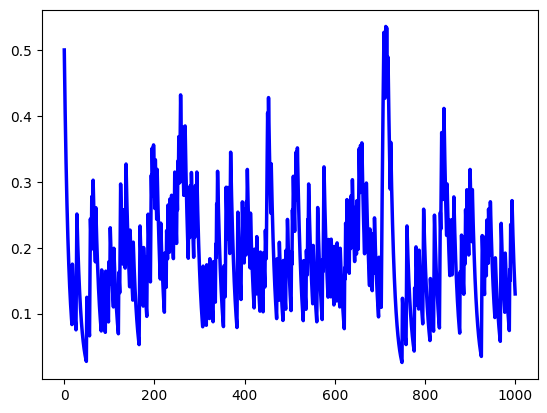

In [24]:
sns.lineplot(x=np.arange(0, num_visits+1), 
             y=probs_to_visit_s,
             color='blue', 
             linewidth=2.5)

In the graph above, we see that the probability we visit **'Squatch's Fry Shack** starts at **0.5**, because we initialized the value to that, and then rapidly goes down because the probability **'Squatch** gives us a large order of fries is low and the probability **Norm** gives us a large order of fries is high. However, due to random chance, sometimes **'Squatch** might give us a larger order of fries and **Norm** might give us a small order of fries, which increases the probability we will visit **'Squatch's Fry Shack**. We see in the second half of the graph that this rare thing happened enough that the probability we visit **'Squatch's Fry Shack** went back up to **0.5**! However, it quickly went back down, which is more in line with what we expect.

In order to find the optimal probability that we should go to **'Squatch's Fry Shack** to get the most fries, we can simply average over all of the probabilities that we calculated for visiting **'Squatch's Fry Shack**.

**NOTE:** Some people prefer to omit the first handful of probabilities from the average since they are affected by our initial value more than the others. This is fine to do, but not needed in this case.

In [16]:
np.mean(probs_to_visit_s)

0.18494488267247974

In the end, we see that, if we want to maximize the number of fries we eat, we should only visit **'Squatch's Fry Shack** **18%** of the time. In other words, there's a higher chance that **Norm** will give us a large order of fries, but he doesn't always do it, and we can offset those dissapointing orders by visiting **'Squatch** from time to time.

# BAM!!!